# Visualizing NYC Bus Timetables

Data source:

http://web.mta.info/developers/data/nyct/bus/google_transit_bronx.zip

http://web.mta.info/developers/data/nyct/bus/google_transit_brooklyn.zip

http://web.mta.info/developers/data/nyct/bus/google_transit_manhattan.zip

http://web.mta.info/developers/data/nyct/bus/google_transit_queens.zip

http://web.mta.info/developers/data/nyct/bus/google_transit_staten_island.zip

Import libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# Brooklyn

### Load GTFS data

In [2]:
agency = pd.read_csv('gtfs/brooklyn/agency.txt')
calendar_dates = pd.read_csv('gtfs/brooklyn/calendar_dates.txt')
calendar = pd.read_csv('gtfs/brooklyn/calendar.txt')
routes = pd.read_csv('gtfs/brooklyn/routes.txt')
shapes = pd.read_csv('gtfs/brooklyn/shapes.txt')
stop_times = pd.read_csv('gtfs/brooklyn/stop_times.txt')
stops = pd.read_csv('gtfs/brooklyn/stops.txt')
trips = pd.read_csv('gtfs/brooklyn/trips.txt')

### Preview the data

In [3]:
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,MTA NYCT,MTA New York City Transit,http://www.mta.info,America/New_York,en,718-330-1234


In [4]:
calendar_dates.head()

,service_id,date,exception_type
0,EN_A7-Weekday-SDon,20170116,2
1,EN_A7-Weekday-SDon,20170220,2
2,EN_A7-Weekday-SDon,20170221,2
3,EN_A7-Weekday-SDon,20170222,2
4,EN_A7-Weekday-SDon,20170223,2


In [5]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,EN_A7-Sunday,0,0,0,0,0,0,1,20170108,20170326
1,EN_A7-Weekday-SDon,1,1,1,1,1,0,0,20170109,20170331
2,EN_A7-Saturday,0,0,0,0,0,1,0,20170114,20170401
3,EN_H7-Weekday,1,1,1,1,1,0,0,20170116,20170116
4,EN_A7-Weekday,1,1,1,1,1,0,0,20170221,20170224


In [6]:
routes.head(2)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,B1,MTA NYCT,B1,Bay Ridge - Manhattan Beach,via 86th St / Ocean Pkwy,3,http://web.mta.info/nyct/bus/schedule/bkln/b00...,00AEEF,FFFFFF
1,B11,MTA NYCT,B11,Sunset Park - Midwood,via 49th & 50th St / Avenue J,3,http://web.mta.info/nyct/bus/schedule/bkln/b01...,006CB7,FFFFFF


In [7]:
shapes.head(2)

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,B10163,40.621900,-74.028521,10001
1,B10163,40.621997,-74.028681,10002


In [8]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,EN_H7-Weekday-008100_B12_1,01:21:00,01:21:00,801177,1,0,0
1,EN_H7-Weekday-008100_B12_1,01:22:36,01:22:36,301386,2,0,0
2,EN_H7-Weekday-008100_B12_1,01:23:07,01:23:07,301387,3,0,0
3,EN_H7-Weekday-008100_B12_1,01:24:01,01:24:01,301388,4,0,0
4,EN_H7-Weekday-008100_B12_1,01:24:18,01:24:18,301389,5,0,0


In [9]:
stops.head()

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,300000,ORIENTAL BL/MACKENZIE ST,NaN,40.578251,-73.939743,NaN,NaN,0,NaN
1,300002,ORIENTAL BL/JAFFRAY ST,NaN,40.578068,-73.943031,NaN,NaN,0,NaN
2,300003,ORIENTAL BL/HASTINGS ST,NaN,40.577961,-73.944664,NaN,NaN,0,NaN
3,300004,ORIENTAL BL/FALMOUTH ST,NaN,40.577721,-73.946205,NaN,NaN,0,NaN
4,300006,ORIENTAL BL/DOVER ST,NaN,40.577354,-73.949554,NaN,NaN,0,NaN


In [10]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,B12,EN_H7-Weekday,EN_H7-Weekday-008100_B12_1,LEFFRTS GDNS OCEAN AV,1,B120114
1,B12,EN_H7-Weekday,EN_H7-Weekday-011000_B12_1,EAST NY ALABAMA AV,0,B120113
2,B12,EN_H7-Weekday,EN_H7-Weekday-016100_B12_1,LEFFRTS GDNS OCEAN AV,1,B120114
3,B12,EN_H7-Weekday,EN_H7-Weekday-019000_B12_1,EAST NY ALABAMA AV,0,B120113
4,B12,EN_H7-Weekday,EN_H7-Weekday-012100_B12_2,LEFFRTS GDNS OCEAN AV,1,B120114


### Merge calendar, service_id and trip_id information

Join calendar and trips on service_id = trip_id.

In [11]:
service_trip_id = pd.merge(calendar[['service_id']],trips[['service_id', 'trip_id']])
service_trip_id.head()

,service_id,trip_id
0,EN_A7-Sunday,EN_A7-Sunday-060000_B84_201
1,EN_A7-Sunday,EN_A7-Sunday-063000_B65_101
2,EN_A7-Sunday,EN_A7-Sunday-066000_B84_201
3,EN_A7-Sunday,EN_A7-Sunday-069000_B65_101
4,EN_A7-Sunday,EN_A7-Sunday-072000_B84_201


Join calendar with trip_id.

In [12]:
calendar = pd.merge(calendar,service_trip_id)
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id
0,EN_A7-Sunday,0,0,0,0,0,0,1,20170108,20170326,EN_A7-Sunday-060000_B84_201
1,EN_A7-Sunday,0,0,0,0,0,0,1,20170108,20170326,EN_A7-Sunday-063000_B65_101
2,EN_A7-Sunday,0,0,0,0,0,0,1,20170108,20170326,EN_A7-Sunday-066000_B84_201
3,EN_A7-Sunday,0,0,0,0,0,0,1,20170108,20170326,EN_A7-Sunday-069000_B65_101
4,EN_A7-Sunday,0,0,0,0,0,0,1,20170108,20170326,EN_A7-Sunday-072000_B84_201


Here's what the stop_times table looks like:

In [13]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,EN_H7-Weekday-008100_B12_1,01:21:00,01:21:00,801177,1,0,0
1,EN_H7-Weekday-008100_B12_1,01:22:36,01:22:36,301386,2,0,0
2,EN_H7-Weekday-008100_B12_1,01:23:07,01:23:07,301387,3,0,0
3,EN_H7-Weekday-008100_B12_1,01:24:01,01:24:01,301388,4,0,0
4,EN_H7-Weekday-008100_B12_1,01:24:18,01:24:18,301389,5,0,0


### Add abritrary arrival and departure dates to timetables

Define a function to add arrival dates to stop_times tables. We will use 1/5/15 as the start date because that is the date we are currently using to visualize taxi trips. This code deals with arrival times > 24 hours and converts them to 1/6/15.

In [14]:
arbitrary_dates = ['1/5/2015', '1/6/2015']

In [15]:
def add_arrival_date(df, dates = arbitrary_dates):
    df = df.copy()
    arrival_date = []
    arrival_time = []

    for i in df['arrival_time']:
        hour = i[:i.find(':')]
        minute = i[i.find(':')+1:i.find(':',4)]
        second = i[i.find(':',5)+1:]
        
        if int(hour) < 24:
            arrival_date.append(dates[0])
            arrival_time.append(i)
        elif 24 <= int(hour) < 48:
            arrival_date.append(dates[1])
            hour = int(hour) - 24
            arrival_time.append(str(hour)+":"+minute+":"+second)
        else:
            arrival_date.append('NA')
            
    df['arrival_date'] = arrival_date
    df['arrival_time'] = arrival_time
    return df

Define a function to add departure dates to stop_times tables. We will use 1/5/15 as the start date because that is the date we are currently using to visualize taxi trips. This code deals with departure times > 24 hours and converts them to 1/6/15.

In [16]:
def add_departure_date(df, dates = arbitrary_dates):
    df = df.copy()
    departure_date = []
    departure_time = []

    for i in df['departure_time']:
        hour = i[:i.find(':')]
        minute = i[i.find(':')+1:i.find(':',4)]
        second = i[i.find(':',5)+1:]
        
        if int(hour) < 24:
            departure_date.append(dates[0])
            departure_time.append(i)
        elif 24 <= int(hour) < 48:
            departure_date.append(dates[1])
            hour = int(hour) - 24
            departure_time.append(str(hour)+":"+minute+":"+second)
        else:
            departure_date.append('NA')
            
    df['departure_date'] = departure_date
    df['departure_time'] = departure_time
    return df

### Get timetables for each day of the week

In [17]:
monday = calendar[calendar['monday'] == 1]
tuesday = calendar[calendar['tuesday'] == 1]
wednesday = calendar[calendar['wednesday'] == 1]
thursday = calendar[calendar['thursday'] == 1]
friday = calendar[calendar['friday'] == 1]
saturday = calendar[calendar['saturday'] == 1]
sunday = calendar[calendar['sunday'] == 1]

### Monday

In [19]:
monday.head(2)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id
1955,EN_A7-Weekday-SDon,1,1,1,1,1,0,0,20170109,20170331,EN_A7-Weekday-SDon-007000_Q24_401
1956,EN_A7-Weekday-SDon,1,1,1,1,1,0,0,20170109,20170331,EN_A7-Weekday-SDon-012000_Q24_401


In [20]:
monday_trips = monday['trip_id']
print "There are ", len(monday_trips), "trips on Monday"
monday_trips.head()

There are  39306 trips on Monday


1955    EN_A7-Weekday-SDon-007000_Q24_401
1956    EN_A7-Weekday-SDon-012000_Q24_401
1957    EN_A7-Weekday-SDon-016000_Q24_401
1958    EN_A7-Weekday-SDon-020000_Q24_401
1959    EN_A7-Weekday-SDon-024500_Q24_401
Name: trip_id, dtype: object

In [21]:
monday_trips.tail()

59502    UP_A7-Weekday-124700_B6_279
59503    UP_A7-Weekday-125500_B6_299
59504    UP_A7-Weekday-126300_B6_288
59505    UP_A7-Weekday-127100_B6_297
59506    UP_A7-Weekday-127900_B6_296
Name: trip_id, dtype: object

Make a dataframe for every trip in monday_trips and append it to triplist.

In [95]:
triplist = []
count = 0

for i in monday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = 3 # brooklyn
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-04 11:26:00.033501 finished trip number 100 / 39306
2017-04-04 11:26:45.893188 finished trip number 200 / 39306
2017-04-04 11:27:24.720754 finished trip number 300 / 39306
2017-04-04 11:28:18.375495 finished trip number 400 / 39306
2017-04-04 11:29:08.917047 finished trip number 500 / 39306
2017-04-04 11:29:44.609299 finished trip number 600 / 39306
2017-04-04 11:30:20.952408 finished trip number 700 / 39306
2017-04-04 11:31:01.520350 finished trip number 800 / 39306
2017-04-04 11:31:33.552149 finished trip number 900 / 39306
2017-04-04 11:32:09.683410 finished trip number 1000 / 39306
2017-04-04 11:32:51.215373 finished trip number 1100 / 39306
2017-04-04 11:33:33.677577 finished trip number 1200 / 39306
2017-04-04 11:34:14.528561 finished trip number 1300 / 39306
2017-04-04 11:34:56.174961 finished trip number 1400 / 39306
2017-04-04 11:35:34.543971 finished trip number 1500 / 39306
2017-04-04 11:36:14.011447 finished trip number 1600 / 39306
2017-04-04 11:36:54.220485 finish

In [96]:
triplist[0].head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,NaN,2015-01-05 01:10:00,2015-01-05 01:10:19,19,40.692478,-73.927902,40.692379,-73.927277
1,NaN,2015-01-05 01:10:19,2015-01-05 01:11:10,51,40.692379,-73.927277,40.691151,-73.925125
2,NaN,2015-01-05 01:11:10,2015-01-05 01:12:04,54,40.691151,-73.925125,40.689896,-73.922913
3,NaN,2015-01-05 01:12:04,2015-01-05 01:13:24,80,40.689896,-73.922913,40.687988,-73.919579
4,NaN,2015-01-05 01:13:24,2015-01-05 01:14:14,50,40.687988,-73.919579,40.686817,-73.917503


In [97]:
len(triplist)

39306

I'm not sure why type_id is NaN. Let's fix that and set it to 3 (the color code for brookyn buses):

In [108]:
for df in triplist:
    df.type_id = 3

In [112]:
triplist[8000]

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,3,2015-01-05 15:04:00,2015-01-05 15:07:00,180,40.678391,-73.903549,40.677212,-73.899139
1,3,2015-01-05 15:07:00,2015-01-05 15:07:58,58,40.677212,-73.899139,40.678295,-73.896996
2,3,2015-01-05 15:07:58,2015-01-05 15:08:52,54,40.678295,-73.896996,40.679253,-73.894920
3,3,2015-01-05 15:08:52,2015-01-05 15:09:13,21,40.679253,-73.894920,40.679634,-73.894119
4,3,2015-01-05 15:09:13,2015-01-05 15:10:08,55,40.679634,-73.894119,40.680656,-73.891998
5,3,2015-01-05 15:10:08,2015-01-05 15:10:54,46,40.680656,-73.891998,40.681480,-73.890282
6,3,2015-01-05 15:10:54,2015-01-05 15:11:24,30,40.681480,-73.890282,40.682034,-73.889137
7,3,2015-01-05 15:11:24,2015-01-05 15:11:46,22,40.682034,-73.889137,40.682438,-73.888290
8,3,2015-01-05 15:11:46,2015-01-05 15:13:05,79,40.682438,-73.888290,40.683861,-73.885269
9,3,2015-01-05 15:13:05,2015-01-05 15:14:14,69,40.683861,-73.885269,40.685093,-73.882629


In [113]:
triplist[0].tail()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
59,3,2015-01-05 01:43:58,2015-01-05 01:44:53,55,40.701218,-73.804832,40.701847,-73.802010
60,3,2015-01-05 01:44:53,2015-01-05 01:45:56,63,40.701847,-73.802010,40.702568,-73.798798
61,3,2015-01-05 01:45:56,2015-01-05 01:46:58,62,40.702568,-73.798798,40.703320,-73.795593
62,3,2015-01-05 01:46:58,2015-01-05 01:48:00,62,40.703320,-73.795593,40.704441,-73.792610
63,3,2015-01-05 01:48:00,2015-01-05 01:48:00,0,40.704441,-73.792610,40.704441,-73.792610


Concatenate the list of dataframes:

In [114]:
data = pd.concat(triplist)

In [115]:
data.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,3,2015-01-05 01:10:00,2015-01-05 01:10:19,19,40.692478,-73.927902,40.692379,-73.927277
1,3,2015-01-05 01:10:19,2015-01-05 01:11:10,51,40.692379,-73.927277,40.691151,-73.925125
2,3,2015-01-05 01:11:10,2015-01-05 01:12:04,54,40.691151,-73.925125,40.689896,-73.922913
3,3,2015-01-05 01:12:04,2015-01-05 01:13:24,80,40.689896,-73.922913,40.687988,-73.919579
4,3,2015-01-05 01:13:24,2015-01-05 01:14:14,50,40.687988,-73.919579,40.686817,-73.917503


In [117]:
data.tail()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
57,3,2015-01-05 22:27:32,2015-01-05 22:27:58,26,40.590073,-73.993713,40.590008,-73.992180
58,3,2015-01-05 22:27:58,2015-01-05 22:28:16,18,40.590008,-73.992180,40.590744,-73.991638
59,3,2015-01-05 22:28:16,2015-01-05 22:28:47,31,40.590744,-73.991638,40.592278,-73.992874
60,3,2015-01-05 22:28:47,2015-01-05 22:29:00,13,40.592278,-73.992874,40.592949,-73.993385
61,3,2015-01-05 22:29:00,2015-01-05 22:29:00,0,40.592949,-73.993385,40.592949,-73.993385


In [116]:
len(data)

1719218

Filter out points with tripduration = 0.

In [118]:
data = data[data.tripduration != 0]

In [119]:
len(data)

1679603

In [123]:
data.columns.to_series().groupby(df.dtypes).groups

{dtype('<M8[ns]'): ['starttime', 'stoptime'],
 dtype('int64'): ['type_id', 'tripduration'],
 dtype('float64'): ['start_lat', 'start_lon', 'end_lat', 'end_lon']}

Sort by starttime:

In [125]:
data = data.sort_values(by='starttime')

In [127]:
data = data.reset_index(drop=True)

In [142]:
data.to_csv('brooklyn_monday_raw.csv')

See how pandas leaves a blank first column with the index?

In [143]:
%%bash 

head brooklyn_monday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555
1,3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555
2,3,2015-01-05 00:00:00,2015-01-05 00:00:23,23,40.645714,-73.902313,40.644871,-73.902176
3,3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555
4,3,2015-01-05 00:00:00,2015-01-05 00:00:48,48,40.748638,-73.938446,40.747673,-73.941116
5,3,2015-01-05 00:00:00,2015-01-05 00:00:48,48,40.748638,-73.938446,40.747673,-73.941116
6,3,2015-01-05 00:00:00,2015-01-05 00:00:48,48,40.748638,-73.938446,40.747673,-73.941116
7,3,2015-01-05 00:00:00,2015-01-05 00:00:23,23,40.645714,-73.902313,40.644871,-73.902176
8,3,2015-01-05 00:00:00,2015-01-05 00:00:23,23,40.645714,-73.902313,40.644871,-73.902176


We need to delete it. Bash command to remove first column from csv output:

In [144]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' brooklyn_monday_raw.csv > brooklyn_monday.csv

In [146]:
%%bash

head brooklyn_monday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555
3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555
3,2015-01-05 00:00:00,2015-01-05 00:00:23,23,40.645714,-73.902313,40.644871,-73.902176
3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555
3,2015-01-05 00:00:00,2015-01-05 00:00:48,48,40.748638,-73.938446,40.747673,-73.941116
3,2015-01-05 00:00:00,2015-01-05 00:00:48,48,40.748638,-73.938446,40.747673,-73.941116
3,2015-01-05 00:00:00,2015-01-05 00:00:48,48,40.748638,-73.938446,40.747673,-73.941116
3,2015-01-05 00:00:00,2015-01-05 00:00:23,23,40.645714,-73.902313,40.644871,-73.902176
3,2015-01-05 00:00:00,2015-01-05 00:00:23,23,40.645714,-73.902313,40.644871,-73.902176


It works!

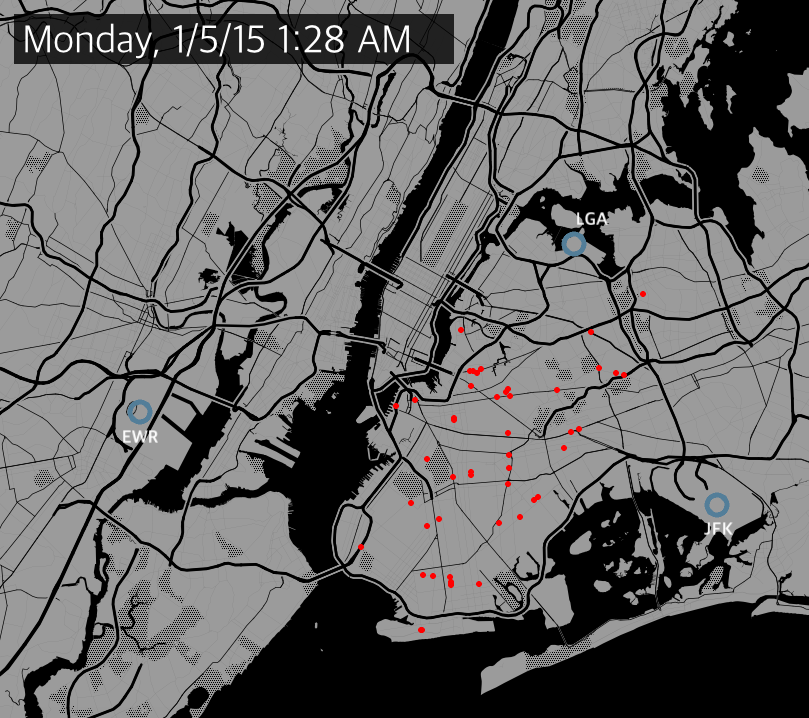

In [147]:
from IPython.display import Image
Image("http://i.imgur.com/Lmtumn6.png")

# Queens

In [148]:
agency = pd.read_csv('gtfs/queens/agency.txt')
calendar_dates = pd.read_csv('gtfs/queens/calendar_dates.txt')
calendar = pd.read_csv('gtfs/queens/calendar.txt')
routes = pd.read_csv('gtfs/queens/routes.txt')
shapes = pd.read_csv('gtfs/queens/shapes.txt')
stop_times = pd.read_csv('gtfs/queens/stop_times.txt')
stops = pd.read_csv('gtfs/queens/stops.txt')
trips = pd.read_csv('gtfs/queens/trips.txt')

service_trip_id = pd.merge(calendar[['service_id']],trips[['service_id', 'trip_id']])
calendar = pd.merge(calendar,service_trip_id)
arbitrary_dates = ['1/5/2015', '1/6/2015']

monday = calendar[calendar['monday'] == 1]
tuesday = calendar[calendar['tuesday'] == 1]
wednesday = calendar[calendar['wednesday'] == 1]
thursday = calendar[calendar['thursday'] == 1]
friday = calendar[calendar['friday'] == 1]
saturday = calendar[calendar['saturday'] == 1]
sunday = calendar[calendar['sunday'] == 1]

monday_trips = monday['trip_id']
print "There are ", len(monday_trips), "trips in Queens on Monday"

triplist = []
count = 0

for i in monday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = 4 # queens
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 1000 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

There are  13233 trips in Queens on Monday
2017-04-04 15:53:27.595116 finished trip number 1000 / 13233
2017-04-04 15:55:50.744061 finished trip number 2000 / 13233
2017-04-04 15:58:00.197758 finished trip number 3000 / 13233
2017-04-04 16:00:45.759398 finished trip number 4000 / 13233
2017-04-04 16:02:56.904756 finished trip number 5000 / 13233
2017-04-04 16:05:49.423916 finished trip number 6000 / 13233
2017-04-04 16:08:24.630847 finished trip number 7000 / 13233
2017-04-04 16:10:50.910236 finished trip number 8000 / 13233
2017-04-04 16:13:24.568231 finished trip number 9000 / 13233
2017-04-04 16:15:36.901874 finished trip number 10000 / 13233
2017-04-04 16:19:00.043297 finished trip number 11000 / 13233
2017-04-04 16:21:39.821951 finished trip number 12000 / 13233
2017-04-04 16:24:08.682188 finished trip number 13000 / 13233


In [150]:
data = pd.concat(triplist)

In [151]:
# drop data points with zero tripduration or start/end latitudes
data = data[data.tripduration != 0]
data = data[data.start_lat != 0]
data = data[data.end_lat != 0]

In [155]:
data.type_id = 4 # queens

In [160]:
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)

In [163]:
data.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,4,2015-01-05 00:00:00,2015-01-05 00:00:47,47,40.717762,-73.735481,40.715351,-73.735641
1,4,2015-01-05 00:00:47,2015-01-05 00:01:35,48,40.715351,-73.735641,40.712963,-73.736069
2,4,2015-01-05 00:01:35,2015-01-05 00:01:52,17,40.712963,-73.736069,40.712055,-73.736557
3,4,2015-01-05 00:01:52,2015-01-05 00:02:32,40,40.712055,-73.736557,40.710285,-73.737556
4,4,2015-01-05 00:02:00,2015-01-05 00:02:47,47,40.717762,-73.735481,40.715351,-73.735641


In [164]:
data.to_csv('queens_monday_raw.csv')

In [166]:
%%bash 

head queens_monday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,4,2015-01-05 00:00:00,2015-01-05 00:00:47,47,40.717762,-73.735481,40.715351,-73.735641
1,4,2015-01-05 00:00:47,2015-01-05 00:01:35,48,40.715351,-73.735641,40.712963,-73.736069
2,4,2015-01-05 00:01:35,2015-01-05 00:01:52,17,40.712963,-73.736069,40.712055,-73.736557
3,4,2015-01-05 00:01:52,2015-01-05 00:02:32,40,40.712055,-73.736557,40.710285,-73.737556
4,4,2015-01-05 00:02:00,2015-01-05 00:02:47,47,40.717762,-73.735481,40.715351,-73.735641
5,4,2015-01-05 00:02:32,2015-01-05 00:02:57,25,40.710285,-73.737556,40.709099,-73.738205
6,4,2015-01-05 00:02:47,2015-01-05 00:03:35,48,40.715351,-73.735641,40.712963,-73.736069
7,4,2015-01-05 00:02:57,2015-01-05 00:04:07,70,40.709099,-73.738205,40.705688,-73.739754
8,4,2015-01-05 00:03:35,2015-01-05 00:03:52,17,40.712963,-73.736069,40.712055,-73.736557


In [167]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' queens_monday_raw.csv > queens_monday.csv

In [168]:
%%bash

head queens_monday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
4,2015-01-05 00:00:00,2015-01-05 00:00:47,47,40.717762,-73.735481,40.715351,-73.735641
4,2015-01-05 00:00:47,2015-01-05 00:01:35,48,40.715351,-73.735641,40.712963,-73.736069
4,2015-01-05 00:01:35,2015-01-05 00:01:52,17,40.712963,-73.736069,40.712055,-73.736557
4,2015-01-05 00:01:52,2015-01-05 00:02:32,40,40.712055,-73.736557,40.710285,-73.737556
4,2015-01-05 00:02:00,2015-01-05 00:02:47,47,40.717762,-73.735481,40.715351,-73.735641
4,2015-01-05 00:02:32,2015-01-05 00:02:57,25,40.710285,-73.737556,40.709099,-73.738205
4,2015-01-05 00:02:47,2015-01-05 00:03:35,48,40.715351,-73.735641,40.712963,-73.736069
4,2015-01-05 00:02:57,2015-01-05 00:04:07,70,40.709099,-73.738205,40.705688,-73.739754
4,2015-01-05 00:03:35,2015-01-05 00:03:52,17,40.712963,-73.736069,40.712055,-73.736557


# Manhattan

In [175]:
agency = pd.read_csv('gtfs/manhattan/agency.txt')
calendar_dates = pd.read_csv('gtfs/manhattan/calendar_dates.txt')
calendar = pd.read_csv('gtfs/manhattan/calendar.txt')
routes = pd.read_csv('gtfs/manhattan/routes.txt')
shapes = pd.read_csv('gtfs/manhattan/shapes.txt')
stop_times = pd.read_csv('gtfs/manhattan/stop_times.txt')
stops = pd.read_csv('gtfs/manhattan/stops.txt')
trips = pd.read_csv('gtfs/manhattan/trips.txt')

service_trip_id = pd.merge(calendar[['service_id']],trips[['service_id', 'trip_id']])
calendar = pd.merge(calendar,service_trip_id)
arbitrary_dates = ['1/5/2015', '1/6/2015']

monday = calendar[calendar['monday'] == 1]
tuesday = calendar[calendar['tuesday'] == 1]
wednesday = calendar[calendar['wednesday'] == 1]
thursday = calendar[calendar['thursday'] == 1]
friday = calendar[calendar['friday'] == 1]
saturday = calendar[calendar['saturday'] == 1]
sunday = calendar[calendar['sunday'] == 1]

monday_trips = monday['trip_id']
print "There are ", len(monday_trips), "trips on Monday"

triplist = []
count = 0

for i in monday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = 5 # manhattan
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 1000 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)
        
data = pd.concat(triplist)
data = data[data.tripduration != 0]

There are  15727 trips on Monday
2017-04-04 16:44:42.466197 finished trip number 1000 / 15727
2017-04-04 16:46:30.413537 finished trip number 2000 / 15727
2017-04-04 16:48:15.917307 finished trip number 3000 / 15727
2017-04-04 16:49:59.808462 finished trip number 4000 / 15727
2017-04-04 16:52:27.841155 finished trip number 5000 / 15727
2017-04-04 16:54:25.526699 finished trip number 6000 / 15727
2017-04-04 16:56:19.144183 finished trip number 7000 / 15727
2017-04-04 16:59:25.985729 finished trip number 8000 / 15727
2017-04-04 17:01:24.340396 finished trip number 9000 / 15727
2017-04-04 17:03:38.330617 finished trip number 10000 / 15727
2017-04-04 17:05:21.896272 finished trip number 11000 / 15727
2017-04-04 17:07:35.190746 finished trip number 12000 / 15727
2017-04-04 17:09:41.426145 finished trip number 13000 / 15727
2017-04-04 17:11:35.309689 finished trip number 14000 / 15727
2017-04-04 17:13:58.137325 finished trip number 15000 / 15727


In [176]:
# drop data points with 0 start/end latitudes
data = data[data.start_lat != 0]
data = data[data.end_lat != 0]

In [178]:
data.type_id = 5 # manhattan

In [179]:
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)

In [180]:
data.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,5,2015-01-05 00:15:00,2015-01-05 00:15:42,42,40.756550,-73.990120,40.758003,-73.989090
1,5,2015-01-05 00:15:00,2015-01-05 00:15:42,42,40.756550,-73.990120,40.758003,-73.989090
2,5,2015-01-05 00:15:42,2015-01-05 00:16:21,39,40.758003,-73.989090,40.759411,-73.988052
3,5,2015-01-05 00:15:42,2015-01-05 00:16:21,39,40.758003,-73.989090,40.759411,-73.988052
4,5,2015-01-05 00:16:21,2015-01-05 00:17:28,67,40.759411,-73.988052,40.761902,-73.986237


In [181]:
data.to_csv('manhattan_monday_raw.csv')

In [182]:
%%bash 

head manhattan_monday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,5,2015-01-05 00:15:00,2015-01-05 00:15:42,42,40.75655,-73.99012,40.758003,-73.98909
1,5,2015-01-05 00:15:00,2015-01-05 00:15:42,42,40.75655,-73.99012,40.758003,-73.98909
2,5,2015-01-05 00:15:42,2015-01-05 00:16:21,39,40.758003,-73.98909,40.759411,-73.988052
3,5,2015-01-05 00:15:42,2015-01-05 00:16:21,39,40.758003,-73.98909,40.759411,-73.988052
4,5,2015-01-05 00:16:21,2015-01-05 00:17:28,67,40.759411,-73.988052,40.761902,-73.986237
5,5,2015-01-05 00:16:21,2015-01-05 00:17:28,67,40.759411,-73.988052,40.761902,-73.986237
6,5,2015-01-05 00:17:28,2015-01-05 00:18:18,50,40.761902,-73.986237,40.763786,-73.984871
7,5,2015-01-05 00:17:28,2015-01-05 00:18:18,50,40.761902,-73.986237,40.763786,-73.984871
8,5,2015-01-05 00:18:18,2015-01-05 00:19:25,67,40.763786,-73.984871,40.766285,-73.98307


In [183]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' manhattan_monday_raw.csv > manhattan_monday.csv

In [184]:
%%bash

head manhattan_monday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
5,2015-01-05 00:15:00,2015-01-05 00:15:42,42,40.75655,-73.99012,40.758003,-73.98909
5,2015-01-05 00:15:00,2015-01-05 00:15:42,42,40.75655,-73.99012,40.758003,-73.98909
5,2015-01-05 00:15:42,2015-01-05 00:16:21,39,40.758003,-73.98909,40.759411,-73.988052
5,2015-01-05 00:15:42,2015-01-05 00:16:21,39,40.758003,-73.98909,40.759411,-73.988052
5,2015-01-05 00:16:21,2015-01-05 00:17:28,67,40.759411,-73.988052,40.761902,-73.986237
5,2015-01-05 00:16:21,2015-01-05 00:17:28,67,40.759411,-73.988052,40.761902,-73.986237
5,2015-01-05 00:17:28,2015-01-05 00:18:18,50,40.761902,-73.986237,40.763786,-73.984871
5,2015-01-05 00:17:28,2015-01-05 00:18:18,50,40.761902,-73.986237,40.763786,-73.984871
5,2015-01-05 00:18:18,2015-01-05 00:19:25,67,40.763786,-73.984871,40.766285,-73.98307


# Bronx

In [185]:
agency = pd.read_csv('gtfs/bronx/agency.txt')
calendar_dates = pd.read_csv('gtfs/bronx/calendar_dates.txt')
calendar = pd.read_csv('gtfs/bronx/calendar.txt')
routes = pd.read_csv('gtfs/bronx/routes.txt')
shapes = pd.read_csv('gtfs/bronx/shapes.txt')
stop_times = pd.read_csv('gtfs/bronx/stop_times.txt')
stops = pd.read_csv('gtfs/bronx/stops.txt')
trips = pd.read_csv('gtfs/bronx/trips.txt')

service_trip_id = pd.merge(calendar[['service_id']],trips[['service_id', 'trip_id']])
calendar = pd.merge(calendar,service_trip_id)
arbitrary_dates = ['1/5/2015', '1/6/2015']

monday = calendar[calendar['monday'] == 1]
tuesday = calendar[calendar['tuesday'] == 1]
wednesday = calendar[calendar['wednesday'] == 1]
thursday = calendar[calendar['thursday'] == 1]
friday = calendar[calendar['friday'] == 1]
saturday = calendar[calendar['saturday'] == 1]
sunday = calendar[calendar['sunday'] == 1]

monday_trips = monday['trip_id']
print "There are ", len(monday_trips), "trips on Monday"

triplist = []
count = 0

for i in monday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = 6 # bronx
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 1000 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

There are  18138 trips on Monday
2017-04-04 17:21:34.157914 finished trip number 1000 / 18138
2017-04-04 17:25:38.283017 finished trip number 2000 / 18138
2017-04-04 17:28:30.539255 finished trip number 3000 / 18138
2017-04-04 17:30:55.715427 finished trip number 4000 / 18138
2017-04-04 17:33:07.475554 finished trip number 5000 / 18138
2017-04-04 17:35:47.280592 finished trip number 6000 / 18138
2017-04-04 17:37:54.669512 finished trip number 7000 / 18138
2017-04-04 17:40:01.396584 finished trip number 8000 / 18138
2017-04-04 17:42:01.717077 finished trip number 9000 / 18138
2017-04-04 17:44:03.960771 finished trip number 10000 / 18138
2017-04-04 17:46:29.452096 finished trip number 11000 / 18138
2017-04-04 17:49:15.302175 finished trip number 12000 / 18138
2017-04-04 17:52:00.397655 finished trip number 13000 / 18138
2017-04-04 17:54:26.814843 finished trip number 14000 / 18138
2017-04-04 17:57:09.504789 finished trip number 15000 / 18138
2017-04-04 17:59:42.918540 finished trip numbe

In [186]:
data = pd.concat(triplist)

In [187]:
data = data[data.tripduration != 0]
data = data[data.start_lat != 0]
data = data[data.end_lat != 0]

In [188]:
data.type_id = 6 # bronx
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)

In [190]:
len(data)

585284

In [189]:
data.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,6,2015-01-05 00:00:00,2015-01-05 00:01:00,60,40.829098,-73.874573,40.826763,-73.874023
1,6,2015-01-05 00:00:00,2015-01-05 00:00:38,38,40.818676,-73.851555,40.818588,-73.854134
2,6,2015-01-05 00:00:00,2015-01-05 00:01:02,62,40.818676,-73.851555,40.818588,-73.854134
3,6,2015-01-05 00:00:00,2015-01-05 00:01:07,67,40.829098,-73.874573,40.826763,-73.874023
4,6,2015-01-05 00:00:38,2015-01-05 00:01:03,25,40.818588,-73.854134,40.820190,-73.854507


In [191]:
data.to_csv('bronx_monday_raw.csv')

In [192]:
%%bash 

head bronx_monday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,6,2015-01-05 00:00:00,2015-01-05 00:01:00,60,40.829098,-73.874573,40.826763,-73.874023
1,6,2015-01-05 00:00:00,2015-01-05 00:00:38,38,40.818676,-73.851555,40.818588,-73.854134
2,6,2015-01-05 00:00:00,2015-01-05 00:01:02,62,40.818676,-73.851555,40.818588,-73.854134
3,6,2015-01-05 00:00:00,2015-01-05 00:01:07,67,40.829098,-73.874573,40.826763,-73.874023
4,6,2015-01-05 00:00:38,2015-01-05 00:01:03,25,40.818588,-73.854134,40.82019,-73.854507
5,6,2015-01-05 00:01:00,2015-01-05 00:01:51,51,40.826763,-73.874023,40.826923,-73.871368
6,6,2015-01-05 00:01:02,2015-01-05 00:01:46,44,40.818588,-73.854134,40.82019,-73.854507
7,6,2015-01-05 00:01:03,2015-01-05 00:01:42,39,40.82019,-73.854507,40.822483,-73.855347
8,6,2015-01-05 00:01:07,2015-01-05 00:02:05,58,40.826763,-73.874023,40.826923,-73.871368


In [193]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' bronx_monday_raw.csv > bronx_monday.csv

In [194]:
%%bash 

head bronx_monday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
6,2015-01-05 00:00:00,2015-01-05 00:01:00,60,40.829098,-73.874573,40.826763,-73.874023
6,2015-01-05 00:00:00,2015-01-05 00:00:38,38,40.818676,-73.851555,40.818588,-73.854134
6,2015-01-05 00:00:00,2015-01-05 00:01:02,62,40.818676,-73.851555,40.818588,-73.854134
6,2015-01-05 00:00:00,2015-01-05 00:01:07,67,40.829098,-73.874573,40.826763,-73.874023
6,2015-01-05 00:00:38,2015-01-05 00:01:03,25,40.818588,-73.854134,40.82019,-73.854507
6,2015-01-05 00:01:00,2015-01-05 00:01:51,51,40.826763,-73.874023,40.826923,-73.871368
6,2015-01-05 00:01:02,2015-01-05 00:01:46,44,40.818588,-73.854134,40.82019,-73.854507
6,2015-01-05 00:01:03,2015-01-05 00:01:42,39,40.82019,-73.854507,40.822483,-73.855347
6,2015-01-05 00:01:07,2015-01-05 00:02:05,58,40.826763,-73.874023,40.826923,-73.871368


# Staten Island

In [196]:
agency = pd.read_csv('gtfs/staten_island/agency.txt')
calendar_dates = pd.read_csv('gtfs/staten_island/calendar_dates.txt')
calendar = pd.read_csv('gtfs/staten_island/calendar.txt')
routes = pd.read_csv('gtfs/staten_island/routes.txt')
shapes = pd.read_csv('gtfs/staten_island/shapes.txt')
stop_times = pd.read_csv('gtfs/staten_island/stop_times.txt')
stops = pd.read_csv('gtfs/staten_island/stops.txt')
trips = pd.read_csv('gtfs/staten_island/trips.txt')

service_trip_id = pd.merge(calendar[['service_id']],trips[['service_id', 'trip_id']])
calendar = pd.merge(calendar,service_trip_id)
arbitrary_dates = ['1/5/2015', '1/6/2015']

monday = calendar[calendar['monday'] == 1]
tuesday = calendar[calendar['tuesday'] == 1]
wednesday = calendar[calendar['wednesday'] == 1]
thursday = calendar[calendar['thursday'] == 1]
friday = calendar[calendar['friday'] == 1]
saturday = calendar[calendar['saturday'] == 1]
sunday = calendar[calendar['sunday'] == 1]

monday_trips = monday['trip_id']
print "There are ", len(monday_trips), "trips on Monday"

triplist = []
count = 0

for i in monday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = 7 # staten_island
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 1000 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

There are  7445 trips on Monday
2017-04-04 18:15:41.860274 finished trip number 1000 / 7445
2017-04-04 18:17:35.099166 finished trip number 2000 / 7445
2017-04-04 18:19:45.822692 finished trip number 3000 / 7445
2017-04-04 18:21:52.995695 finished trip number 4000 / 7445
2017-04-04 18:23:57.787851 finished trip number 5000 / 7445
2017-04-04 18:26:01.166998 finished trip number 6000 / 7445
2017-04-04 18:28:22.725844 finished trip number 7000 / 7445


In [197]:
data = pd.concat(triplist)

In [198]:
data = data[data.tripduration != 0]
data = data[data.start_lat != 0]
data = data[data.end_lat != 0]

In [199]:
data.type_id = 7 # staten island
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)

In [200]:
data.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,7,2015-01-05 00:00:00,2015-01-05 00:01:12,72,40.560760,-74.171089,40.556683,-74.169037
1,7,2015-01-05 00:00:00,2015-01-05 00:01:12,72,40.560760,-74.171089,40.556683,-74.169037
2,7,2015-01-05 00:00:00,2015-01-05 00:00:45,45,40.643429,-74.073654,40.641872,-74.075699
3,7,2015-01-05 00:00:45,2015-01-05 00:01:40,55,40.641872,-74.075699,40.638756,-74.075867
4,7,2015-01-05 00:01:12,2015-01-05 00:02:20,68,40.556683,-74.169037,40.552063,-74.168007


In [201]:
data.to_csv('staten_island_monday_raw.csv')

In [202]:
%%bash 

head staten_island_monday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,7,2015-01-05 00:00:00,2015-01-05 00:01:12,72,40.56076,-74.171089,40.556683,-74.169037
1,7,2015-01-05 00:00:00,2015-01-05 00:01:12,72,40.56076,-74.171089,40.556683,-74.169037
2,7,2015-01-05 00:00:00,2015-01-05 00:00:45,45,40.643429,-74.073654,40.641872,-74.075699
3,7,2015-01-05 00:00:45,2015-01-05 00:01:40,55,40.641872,-74.075699,40.638756,-74.075867
4,7,2015-01-05 00:01:12,2015-01-05 00:02:20,68,40.556683,-74.169037,40.552063,-74.168007
5,7,2015-01-05 00:01:12,2015-01-05 00:02:20,68,40.556683,-74.169037,40.552063,-74.168007
6,7,2015-01-05 00:01:40,2015-01-05 00:02:00,20,40.638756,-74.075867,40.637814,-74.076157
7,7,2015-01-05 00:02:00,2015-01-05 00:02:22,22,40.637814,-74.076157,40.638081,-74.077682
8,7,2015-01-05 00:02:20,2015-01-05 00:02:47,27,40.552063,-74.168007,40.550243,-74.167603


In [203]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' staten_island_monday_raw.csv > staten_island_monday.csv

In [204]:
%%bash 

head staten_island_monday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
7,2015-01-05 00:00:00,2015-01-05 00:01:12,72,40.56076,-74.171089,40.556683,-74.169037
7,2015-01-05 00:00:00,2015-01-05 00:01:12,72,40.56076,-74.171089,40.556683,-74.169037
7,2015-01-05 00:00:00,2015-01-05 00:00:45,45,40.643429,-74.073654,40.641872,-74.075699
7,2015-01-05 00:00:45,2015-01-05 00:01:40,55,40.641872,-74.075699,40.638756,-74.075867
7,2015-01-05 00:01:12,2015-01-05 00:02:20,68,40.556683,-74.169037,40.552063,-74.168007
7,2015-01-05 00:01:12,2015-01-05 00:02:20,68,40.556683,-74.169037,40.552063,-74.168007
7,2015-01-05 00:01:40,2015-01-05 00:02:00,20,40.638756,-74.075867,40.637814,-74.076157
7,2015-01-05 00:02:00,2015-01-05 00:02:22,22,40.637814,-74.076157,40.638081,-74.077682
7,2015-01-05 00:02:20,2015-01-05 00:02:47,27,40.552063,-74.168007,40.550243,-74.167603


# Append all CSVs together (and other useful bash tools)

http://stackoverflow.com/questions/24641948/merging-csv-files-appending-instead-of-merging/24643455

In [205]:
ls

BusStationSketch/         data/                     raw_data_urls.txt
DataWrangling.ipynb       download_raw_data.sh      rawdata/
DataWrangling_v2.ipynb    gtfs/                     sandbox/
bronx_monday.csv          manhattan_monday.csv      staten_island_monday.csv
brooklyn_monday.csv       queens_monday.csv         taxi_monday.csv


In [206]:
%%bash
for filename in ./*.csv; do
 echo $filename
done

./bronx_monday.csv
./brooklyn_monday.csv
./manhattan_monday.csv
./queens_monday.csv
./staten_island_monday.csv
./taxi_monday.csv


In [174]:
%%bash

OutFileName="output.csv"              # Output name
i=0                                       # Set a counter
for filename in ./*.csv; do 
 if [ "$filename"  != "$OutFileName" ] ;      # Avoid recursion 
 then 
   if [[ $i -eq 0 ]] ; then 
      head -1  $filename >   $OutFileName # Copy header if it is the first file
   fi
   tail -n +2  $filename >>  $OutFileName # Append from the 2nd line each file
   i=$(( $i + 1 ))                        # Increase the counter
 fi
done

Sample every nth line of output file to make it smaller:

In [ ]:
# get every other line
awk 'NR%2==0' output.csv > output2.csv

# add header back in
for csv in output2.csv; do (echo "type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon"; cat output2.csv) > tmp; mv tmp output3.csv; done

# count lines in csv
awk '{n+=1} END {print n}' output3.csv

Sort output.csv so it can later be split in half.

In [2]:
df = pd.read_csv("/Users/Will/Dropbox/Portfolio/bus/sandbox/output.csv")

In [3]:
df.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,6,2015-01-05 00:00:00,2015-01-05 00:01:00,60,40.829098,-73.874573,40.826763,-73.874023
1,6,2015-01-05 00:00:00,2015-01-05 00:00:38,38,40.818676,-73.851555,40.818588,-73.854134
2,6,2015-01-05 00:00:00,2015-01-05 00:01:02,62,40.818676,-73.851555,40.818588,-73.854134
3,6,2015-01-05 00:00:00,2015-01-05 00:01:07,67,40.829098,-73.874573,40.826763,-73.874023
4,6,2015-01-05 00:00:38,2015-01-05 00:01:03,25,40.818588,-73.854134,40.820190,-73.854507


In [4]:
df.tail()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
4092702,2,2015-01-05 23:59:46,2015-01-06 00:05:09,323,40.691307,-73.987389,40.689060,-74.000755
4092703,2,2015-01-05 23:59:47,2015-01-06 00:05:19,332,40.746876,-73.890831,40.764481,-73.889847
4092704,2,2015-01-05 23:59:49,2015-01-06 00:07:00,431,40.809402,-73.951485,40.798767,-73.929794
4092705,2,2015-01-05 23:59:57,2015-01-06 00:05:27,330,40.747173,-73.888702,40.757820,-73.884476
4092706,2,2015-01-06 00:00:00,2015-01-06 00:00:00,0,40.789150,-73.952850,40.846130,-73.884064


In [7]:
df = df.sort_values(by='starttime')

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,6,2015-01-05 00:00:00,2015-01-05 00:01:00,60,40.829098,-73.874573,40.826763,-73.874023
1,7,2015-01-05 00:00:00,2015-01-05 00:00:45,45,40.643429,-74.073654,40.641872,-74.075699
2,2,2015-01-05 00:00:00,2015-01-05 00:06:44,404,40.723946,-73.951294,40.697411,-73.964851
3,3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555
4,3,2015-01-05 00:00:00,2015-01-05 00:01:09,69,40.642979,-73.878334,40.645187,-73.878555


In [10]:
df.to_csv("/Users/Will/Dropbox/Portfolio/bus/sandbox/output_sorted.csv")

In [13]:
len(df) -(len(df) / 2)

2046354

drop first column

In [ ]:
%%bash

cut -d'|' -f2- infile

rename files using loop:

In [ ]:
%%bash

a=1
for i in *.jpg; do
  new=$(printf "%04d.jpg" "$a") #04 pad to length of 4
  mv -- "$i" "$new"
  let a=a+1
done